In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy import stats
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [10]:
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key



city_name = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []



for city in cities:
    try:
        response = (requests.get(url + '&q=' + city)).json()
        city_name.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        print(f"{city} found! Appending information")
        
    
    except:
        print("unable to locate city ")
     

gazanjyk found! Appending information
naze found! Appending information
kasulu found! Appending information
unable to locate city 
boa vista found! Appending information
bengkulu found! Appending information
hilo found! Appending information
kapaa found! Appending information
puerto ayora found! Appending information
hermanus found! Appending information
cap malheureux found! Appending information
bolu found! Appending information
springbok found! Appending information
rolla found! Appending information
noumea found! Appending information
ushuaia found! Appending information
chokurdakh found! Appending information
busselton found! Appending information
mount isa found! Appending information
lagoa found! Appending information
rikitea found! Appending information
cessnock found! Appending information
port hardy found! Appending information
barrow found! Appending information
albany found! Appending information
lobao found! Appending information
ribeira grande found! Appending information

benjamin aceval found! Appending information
klaksvik found! Appending information
kavaratti found! Appending information
hasaki found! Appending information
uni found! Appending information
umri found! Appending information
torbay found! Appending information
tura found! Appending information
dali found! Appending information
bardiyah found! Appending information
pucallpa found! Appending information
port hawkesbury found! Appending information
quang ngai found! Appending information
la paz found! Appending information
kruisfontein found! Appending information
daru found! Appending information
tongren found! Appending information
unable to locate city 
unable to locate city 
narsaq found! Appending information
ravar found! Appending information
richards bay found! Appending information
ketchikan found! Appending information
selma found! Appending information
bathsheba found! Appending information
unable to locate city 
ketrzyn found! Appending information
saskylakh found! Appending in

okha found! Appending information
tilichiki found! Appending information
half moon bay found! Appending information
aksaray found! Appending information
buraydah found! Appending information
baoying found! Appending information
abha found! Appending information
hamilton found! Appending information
anadyr found! Appending information
lujiang found! Appending information
murakami found! Appending information
kamenka found! Appending information
unable to locate city 
unable to locate city 
sur found! Appending information
unable to locate city 
karratha found! Appending information
vanavara found! Appending information
gorom-gorom found! Appending information
nizhnyaya omka found! Appending information
tezu found! Appending information
sioux lookout found! Appending information
concepcion del oro found! Appending information
beloha found! Appending information
honningsvag found! Appending information
namikupa found! Appending information
jalu found! Appending information
vangaindrano fo

In [11]:
df = pd.DataFrame({
                        'City': city_name,
                        'Cloudiness': Cloudiness,
                        'Country': Country,
                        'Date': Date,
                        'Humidity': Humidity,
                        'Lat': Lat,
                        'Lng': Lng,
                        'Max Temp': Max_Temp,
                        'Wind Speed': Wind_Speed
                        })

pd.DataFrame.to_csv(df, 'weater_data.csv')
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bereket,0,TM,1589596155,41,39.24,55.52,67.15,1.68
1,Naze,75,JP,1589596155,78,28.37,129.48,82.40,16.11
2,Kasulu,40,TZ,1589596155,88,-4.58,30.10,71.60,1.34
3,Boa Vista,87,BR,1589596155,74,2.82,-60.67,80.60,10.29
4,Bengkulu,30,ID,1589596155,67,-3.80,102.27,84.70,2.71


Text(0, 0.5, 'Maximum Temperature')

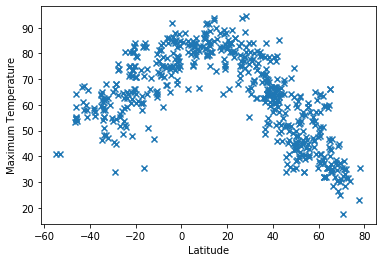

In [14]:
x = df['Lat']
y = df['Max Temp']

plt.scatter(x,y, marker="x")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")